# Dataset

* The dataset that we are using here is the metro interstate traffic volume dataset.
* This dataset will be used in the application of all of the deep learninig models.
* This notebook is to perform all the pre-processing and have the dataset prepped for usage.

## Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('data/Metro_Interstate_Traffic_Volume.csv')
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [3]:
df.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [4]:
df['date_time'] = pd.to_datetime(df['date_time'])

In [5]:
df = df.drop_duplicates(subset='date_time', ignore_index=True)

In [6]:
df.shape

(40575, 9)

In [16]:
date_range = list(pd.date_range('2012-10-02 09:00:00', '2018-09-30 23:00:00', freq='H'))
len(date_range)

52551

* We are slecting the values form October 2012 - September 2018 in hourly itervals.

In [17]:
new_df = pd.DataFrame({'date_time': date_range})
new_df.head()

,date_time
0,2012-10-02 09:00:00
1,2012-10-02 10:00:00
2,2012-10-02 11:00:00
3,2012-10-02 12:00:00
4,2012-10-02 13:00:00


In [28]:
full_df = pd.merge(new_df, df, how='left', on='date_time')

In [29]:
full_df.shape

(52551, 9)

In [30]:
full_df.isna().sum()

date_time                  0
holiday                11976
temp                   11976
rain_1h                11976
snow_1h                11976
clouds_all             11976
weather_main           11976
weather_description    11976
traffic_volume         11976
dtype: int64

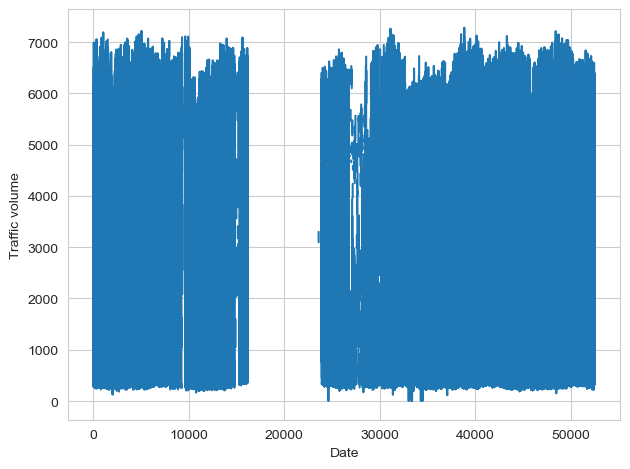

In [31]:
plt.plot(full_df.traffic_volume)
plt.xlabel('Date')
plt.ylabel('Traffic volume')
plt.tight_layout()

In [32]:
full_df[35000:].isna().sum()

date_time                0
holiday                104
temp                   104
rain_1h                104
snow_1h                104
clouds_all             104
weather_main           104
weather_description    104
traffic_volume         104
dtype: int64

In [33]:
full_df = full_df[35000:].reset_index(drop=True)

In [34]:
full_df.head()

,date_time,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
0,2016-09-29 17:00:00,None,291.75,0.0,0.0,0.0,Clear,Sky is Clear,5551.0
1,2016-09-29 18:00:00,None,290.36,0.0,0.0,0.0,Clear,Sky is Clear,4132.0
2,2016-09-29 19:00:00,None,287.86,0.0,0.0,0.0,Clear,Sky is Clear,3435.0
3,2016-09-29 20:00:00,None,285.91,0.0,0.0,0.0,Clear,Sky is Clear,2765.0
4,2016-09-29 21:00:00,None,284.31,0.0,0.0,0.0,Clear,Sky is Clear,2443.0


*  As there were a lot of missing values before 35000th index we are removing all that data.

In [35]:
full_df = full_df.drop(['holiday', 'weather_main', 'weather_description'], axis=1)
full_df.shape

(17551, 6)

In [36]:
full_df = full_df.fillna(full_df.groupby(full_df.date_time.dt.hour).transform('median'))

C:\Users\delli\AppData\Local\Temp\ipykernel_25196\2917720513.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  full_df = full_df.fillna(full_df.groupby(full_df.date_time.dt.hour).transform('median'))


In [37]:
full_df.isna().sum()

date_time         0
temp              0
rain_1h           0
snow_1h           0
clouds_all        0
traffic_volume    0
dtype: int64

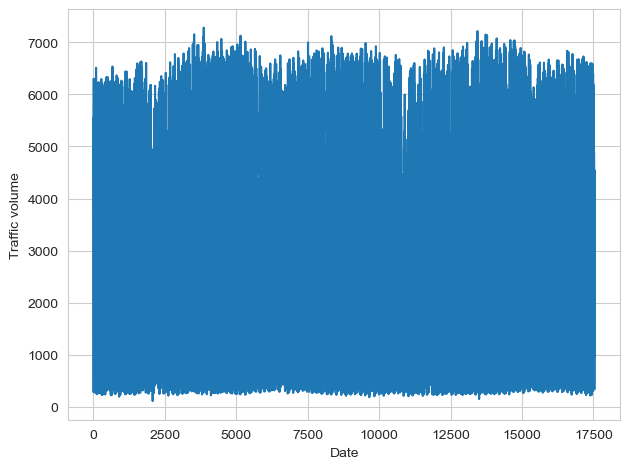

In [38]:
plt.plot(full_df.traffic_volume)
plt.xlabel('Date')
plt.ylabel('Traffic volume')
plt.tight_layout()

In [40]:
full_df.to_csv('data/metro_interstate_traffic_volume_preprocessed.csv', index=False, header=True)

## Data Exploration

In [41]:
df = pd.read_csv('data/metro_interstate_traffic_volume_preprocessed.csv')
df.head()

,date_time,temp,rain_1h,snow_1h,clouds_all,traffic_volume
0,2016-09-29 17:00:00,291.75,0.0,0,0,5551.0
1,2016-09-29 18:00:00,290.36,0.0,0,0,4132.0
2,2016-09-29 19:00:00,287.86,0.0,0,0,3435.0
3,2016-09-29 20:00:00,285.91,0.0,0,0,2765.0
4,2016-09-29 21:00:00,284.31,0.0,0,0,2443.0


In [44]:
df.tail()

,date_time,temp,rain_1h,snow_1h,clouds_all,traffic_volume
17546,2018-09-30 19:00:00,283.45,0.0,0,75,3543.0
17547,2018-09-30 20:00:00,282.76,0.0,0,90,2781.0
17548,2018-09-30 21:00:00,282.73,0.0,0,90,2159.0
17549,2018-09-30 22:00:00,282.09,0.0,0,90,1450.0
17550,2018-09-30 23:00:00,282.12,0.0,0,90,954.0


In [42]:
df.shape

(17551, 6)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17551 entries, 0 to 17550
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date_time       17551 non-null  object 
 1   temp            17551 non-null  float64
 2   rain_1h         17551 non-null  float64
 3   snow_1h         17551 non-null  int64  
 4   clouds_all      17551 non-null  int64  
 5   traffic_volume  17551 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 822.8+ KB


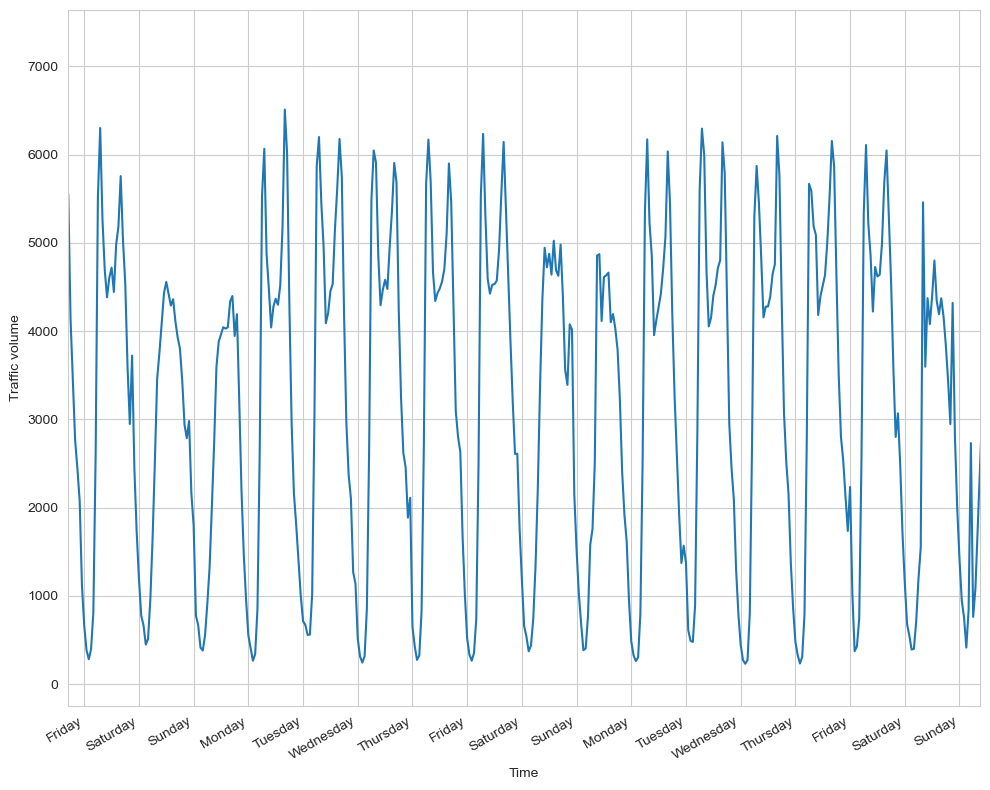

In [49]:
fig = plt.figure(figsize=(10, 8))
plt.plot(df['traffic_volume'])
plt.xlabel('Time')
plt.ylabel('Traffic volume')
plt.xticks(np.arange(7, 400, 24), ['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 
                                   'Saturday', 'Sunday'])
plt.xlim(0, 400)
fig.autofmt_xdate()
plt.tight_layout()

* From the data we can see that there is clearly a daily seasonality, we see that there is peak mid-day and there is less traffic in the morning and night.
* Also we observe that there is comparitively less traffic on Saturdays and Sundays.

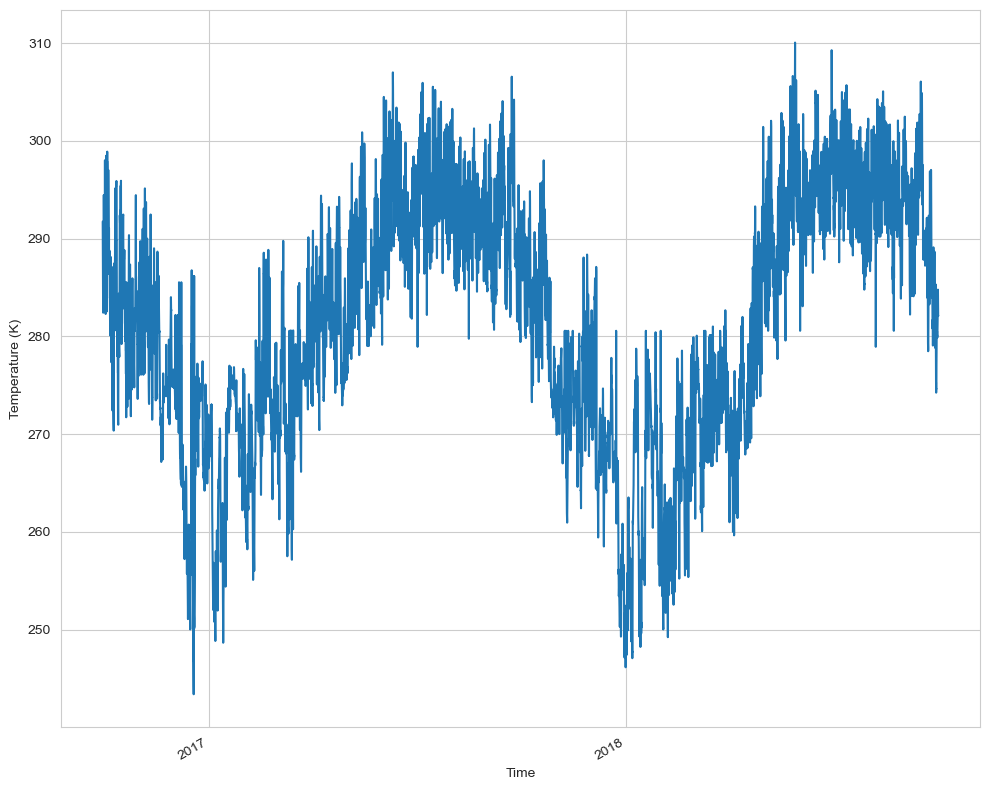

In [50]:
fig = plt.figure(figsize=(10, 8))
plt.plot(df['temp'])
plt.xlabel('Time')
plt.ylabel('Temperature (K)')
plt.xticks([2239, 10999], [2017, 2018])
fig.autofmt_xdate()
plt.tight_layout()

* We can see that there is a seaonal yearly pattern in the temperature due to different seasons in the year.
* Temperature peaks in the summer and dips in the winter.

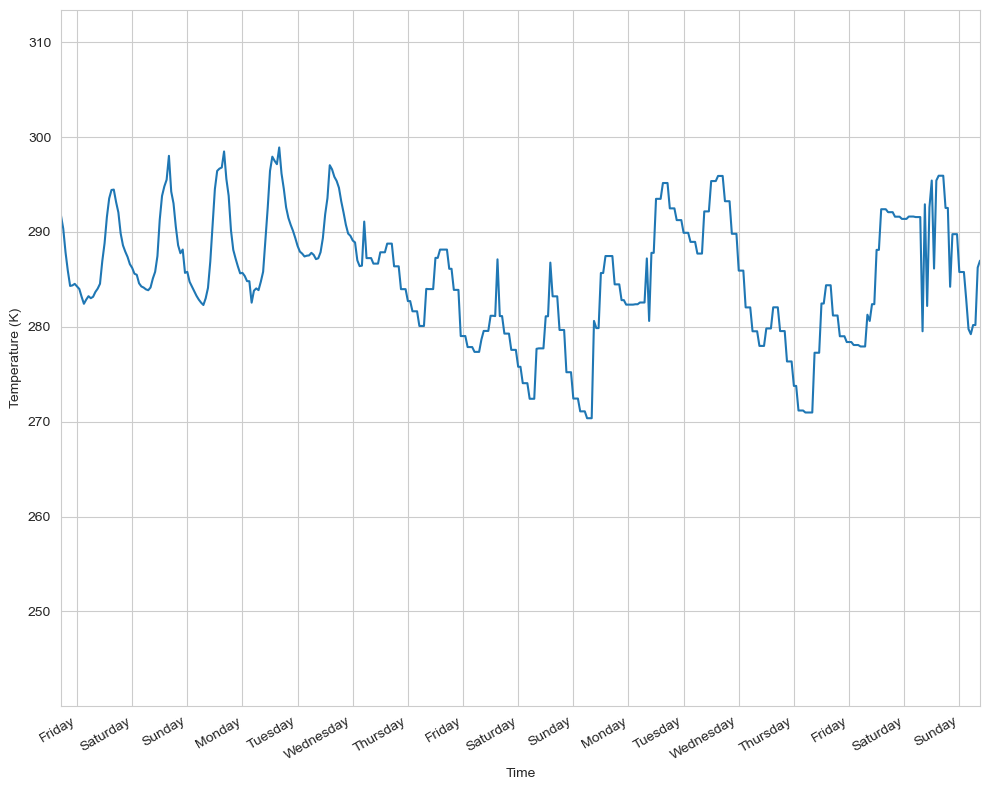

In [52]:
fig = plt.figure(figsize=(10, 8))
plt.plot(df['temp'])
plt.xlabel('Time')
plt.ylabel('Temperature (K)')
plt.xticks(np.arange(7, 400, 24), ['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 
                                   'Saturday', 'Sunday'])
plt.xlim(0, 400)
fig.autofmt_xdate()
plt.tight_layout()

* As we can see that there is lower temperature in the start and end of the day and it peaks at around mid-day.

## Feature Engineering

In [53]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
temp,17551.0,281.416203,12.688262,243.39,272.22,282.41,291.89,310.07
rain_1h,17551.0,0.025523,0.259794,0.00,0.00,0.00,0.00,10.60
snow_1h,17551.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00
clouds_all,17551.0,42.034129,39.065960,0.00,1.00,40.00,90.00,100.00
traffic_volume,17551.0,3321.484588,1969.223949,113.00,1298.00,3518.00,4943.00,7280.00


* As we can see from the data, the attribute rain_1h is 0 for 75% of the data. So, we can say that it will not be a good predictor of traffic volume and hence we remove it.
* The attribute snow-1h is 0 throughout so we can easily remove it as well.

In [54]:
cols_to_drop = ['rain_1h', 'snow_1h']
df = df.drop(cols_to_drop, axis=1)
df.head()

,date_time,temp,clouds_all,traffic_volume
0,2016-09-29 17:00:00,291.75,0,5551.0
1,2016-09-29 18:00:00,290.36,0,4132.0
2,2016-09-29 19:00:00,287.86,0,3435.0
3,2016-09-29 20:00:00,285.91,0,2765.0
4,2016-09-29 21:00:00,284.31,0,2443.0


* Now a common problem we encounter is not being able to use the time as we need to encode it as a usable feature.
* So, we convert it from a date_time string to a numerical value.

In [55]:
import datetime

In [56]:
timestamp_s = pd.to_datetime(df['date_time']).map(datetime.datetime.timestamp)

* The above simply converts the time to seconds.
* But as seconds are linerly increasing we loose the cylindrical nature of time.
* To recover this, we can simply apply as sine transformation.

In [57]:
day = 24 * 60 * 60

df['day_sin'] = (np.sin(timestamp_s * (2 * np.pi / day))).values
df['day_cos'] = (np.cos(timestamp_s * (2 * np.pi / day))).values

In [58]:
df = df.drop(['date_time'], axis=1)
df.head()

,temp,clouds_all,traffic_volume,day_sin,day_cos
0,291.75,0,5551.0,0.130526,-0.991445
1,290.36,0,4132.0,-0.130526,-0.991445
2,287.86,0,3435.0,-0.382683,-0.923880
3,285.91,0,2765.0,-0.608761,-0.793353
4,284.31,0,2443.0,-0.793353,-0.608761


* Now we are applying a cos function also.
* When we apply sine we get the cylindrical property back but we are unable to distinguish between a.m and p.m.
* We apply cosine to get it back.

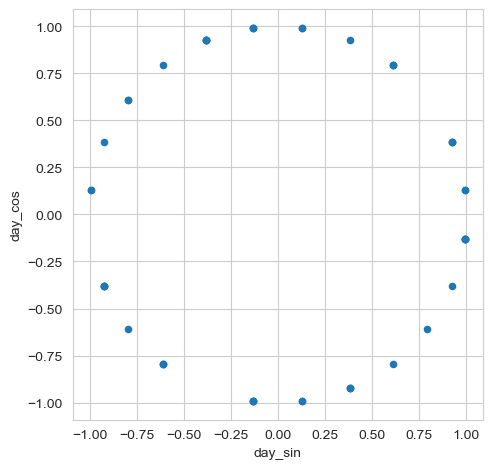

In [59]:
df.sample(50).plot.scatter('day_sin', 'day_cos').set_aspect('equal')
plt.tight_layout()

* We can plot and see that we have represented each timestamp as a point on the clock.

## Data Splitting

* We split the data as training, validation, testing in the following split, 70:20:10.

In [60]:
n = len(df)

train_df = df[0:int(n * 0.7)]
val_df = df[int(n * 0.7):int(n * 0.9)]
test_df = df[int(n * 0.9):]

train_df.shape, val_df.shape, test_df.shape

((12285, 5), (3510, 5), (1756, 5))

* Now we must scale the data so that the values lie between 0 and 1.
* This decreases the time required for training the model.

In [61]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train_df)

train_df[train_df.columns] = scaler.transform(train_df[train_df.columns])
val_df[val_df.columns] = scaler.transform(val_df[val_df.columns])
test_df[test_df.columns] = scaler.transform(test_df[test_df.columns])

C:\Users\delli\AppData\Local\Temp\ipykernel_25196\2663594738.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[train_df.columns] = scaler.transform(train_df[train_df.columns])
C:\Users\delli\AppData\Local\Temp\ipykernel_25196\2663594738.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df[val_df.columns] = scaler.transform(val_df[val_df.columns])
C:\Users\delli\AppData\Local\Temp\ipykernel_25196\2663594738.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

In [62]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
temp,12285.0,0.555681,0.196527,0.0,0.424800,0.557913,0.715072,1.0
clouds_all,12285.0,0.431034,0.393716,0.0,0.010000,0.400000,0.900000,1.0
traffic_volume,12285.0,0.445735,0.273635,0.0,0.165899,0.473141,0.671271,1.0
day_sin,12285.0,0.499927,0.356629,0.0,0.099900,0.434174,0.807007,1.0
day_cos,12285.0,0.500095,0.356608,0.0,0.192993,0.565826,0.900100,1.0


In [63]:
test_df

,temp,clouds_all,traffic_volume,day_sin,day_cos
15795,0.767405,0.90,0.401563,1.929928e-01,0.099900
15796,0.756876,0.90,0.348821,9.990042e-02,0.192993
15797,0.754833,0.90,0.302637,3.407417e-02,0.307007
15798,0.754833,0.90,0.187108,1.083078e-12,0.434174
15799,0.756247,0.90,0.080926,2.987055e-13,0.565826
...,...,...,...,...,...
17546,0.629577,0.75,0.478582,3.070072e-01,0.034074
17547,0.618733,0.90,0.372262,1.929928e-01,0.099900
17548,0.618262,0.90,0.285475,9.990042e-02,0.192993
17549,0.608204,0.90,0.186549,3.407417e-02,0.307007


In [64]:
train_df.to_csv('data/train.csv')
val_df.to_csv('data/val.csv')
test_df.to_csv('data/test.csv')